# Proyek Analisis Data: Bike sharing data
- **Nama:** MOCHAMMAD RIFKY ANDRIANTO
- **Email:** rifky140904@gmail.com
- **ID Dicoding:** mochammadrifky123

## Menentukan Pertanyaan Bisnis

- 1. Bagaimana kondisi cuaca dan faktor musiman memengaruhi permintaan penyewaan sepeda?
- 2. Kapan waktu dan hari puncak penggunaan layanan berbagi sepeda, dan bagaimana operasi dapat dioptimalkan seputar periode ini?

## Import Semua Packages/Library yang Digunakan

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [9]:
#connecting to drive
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [10]:
#day_table
day_df = pd.read_csv(r'/content/gdrive/My Drive/Bike-sharing-dataset/day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [11]:
#hour_table
hour_df = pd.read_csv(r'/content/gdrive/My Drive/Bike-sharing-dataset/hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

In [12]:
# Assessing day_df
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [15]:
## missing value
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [16]:
## count duplicate
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [17]:
## Memeriksa Parameter Numeric
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [18]:
# Assessing hour_df
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [19]:
## missing value
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [20]:
## count duplicate
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


In [21]:
## Memeriksa Parameter Numeric
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

In [22]:
# Cleaning Data day_df
## Drop duplicate
day_df.drop_duplicates(inplace=True)
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [24]:
# Cleaning Data hour_df
## Drop duplicate
hour_df.drop_duplicates(inplace=True)
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


## Exploratory Data Analysis (EDA)

### Explore ...

In [31]:
# 1. Tabel Perhitungan untuk Pengaruh Suhu dan Faktor Musiman

## Perhitungan rata-rata jumlah penyewaan berdasarkan suhu
temp_mean = hour_df.groupby('temp')['cnt'].mean().reset_index()
temp_mean.columns = ['Suhu (ternormalisasi)', 'Rata-rata Jumlah Penyewaan']

## Perhitungan rata-rata jumlah penyewaan berdasarkan musim
season_mean = hour_df.groupby('season')['cnt'].mean().reset_index()
season_mean.columns = ['Musim', 'Rata-rata Jumlah Penyewaan']
season_mean['Musim'] = season_mean['Musim'].map({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'})

## Tampilkan tabel
print("Tabel Rata-rata Jumlah Penyewaan Berdasarkan Suhu:")
print(temp_mean)

print("\nTabel Rata-rata Jumlah Penyewaan Berdasarkan Musim:")
print(season_mean)


Tabel Rata-rata Jumlah Penyewaan Berdasarkan Suhu:
    Suhu (ternormalisasi)  Rata-rata Jumlah Penyewaan
0                    0.02                   41.882353
1                    0.04                   35.625000
2                    0.06                   42.000000
3                    0.08                   28.235294
4                    0.10                   49.294118
5                    0.12                   58.421053
6                    0.14                   55.108696
7                    0.16                   65.578261
8                    0.18                   60.116129
9                    0.20                   79.745763
10                   0.22                   69.914489
11                   0.24                   80.159004
12                   0.26                   87.960644
13                   0.28                  106.750831
14                   0.30                  115.917317
15                   0.32                  134.230769
16                   0.34      

In [32]:
#2. Tabel Perhitungan untuk Jam dan Hari Puncak Penggunaan python

## Perhitungan rata-rata jumlah penyewaan berdasarkan jam
hour_mean = hour_df.groupby('hr')['cnt'].mean().reset_index()
hour_mean.columns = ['Jam', 'Rata-rata Jumlah Penyewaan']

## Perhitungan rata-rata jumlah penyewaan berdasarkan hari dalam seminggu
weekday_mean = hour_df.groupby('weekday')['cnt'].mean().reset_index()
weekday_mean.columns = ['Hari dalam Seminggu', 'Rata-rata Jumlah Penyewaan']
weekday_mean['Hari dalam Seminggu'] = weekday_mean['Hari dalam Seminggu'].map({
    0: 'Senin', 1: 'Selasa', 2: 'Rabu', 3: 'Kamis', 4: 'Jumat', 5: 'Sabtu', 6: 'Minggu'
})

## Perhitungan rata-rata jumlah penyewaan berdasarkan bulan
month_mean = hour_df.groupby('mnth')['cnt'].mean().reset_index()
month_mean.columns = ['Bulan', 'Rata-rata Jumlah Penyewaan']
month_mean['Bulan'] = month_mean['Bulan'].map({
    1: 'Januari', 2: 'Februari', 3: 'Maret', 4: 'April', 5: 'Mei', 6: 'Juni',
    7: 'Juli', 8: 'Agustus', 9: 'September', 10: 'Oktober', 11: 'November', 12: 'Desember'
})

## Tampilkan tabel
print("\nTabel Rata-rata Jumlah Penyewaan Berdasarkan Jam:")
print(hour_mean)

print("\nTabel Rata-rata Jumlah Penyewaan Berdasarkan Hari dalam Seminggu:")
print(weekday_mean)

print("\nTabel Rata-rata Jumlah Penyewaan Berdasarkan Bulan:")
print(month_mean)



Tabel Rata-rata Jumlah Penyewaan Berdasarkan Jam:
    Jam  Rata-rata Jumlah Penyewaan
0     0                   53.898072
1     1                   33.375691
2     2                   22.869930
3     3                   11.727403
4     4                    6.352941
5     5                   19.889819
6     6                   76.044138
7     7                  212.064649
8     8                  359.011004
9     9                  219.309491
10   10                  173.668501
11   11                  208.143054
12   12                  253.315934
13   13                  253.661180
14   14                  240.949246
15   15                  251.233196
16   16                  311.983562
17   17                  461.452055
18   18                  425.510989
19   19                  311.523352
20   20                  226.030220
21   21                  172.314560
22   22                  131.335165
23   23                   87.831044

Tabel Rata-rata Jumlah Penyewaan Berdasarkan Har

## Visualization & Explanatory Analysis

### Pertanyaan 1:

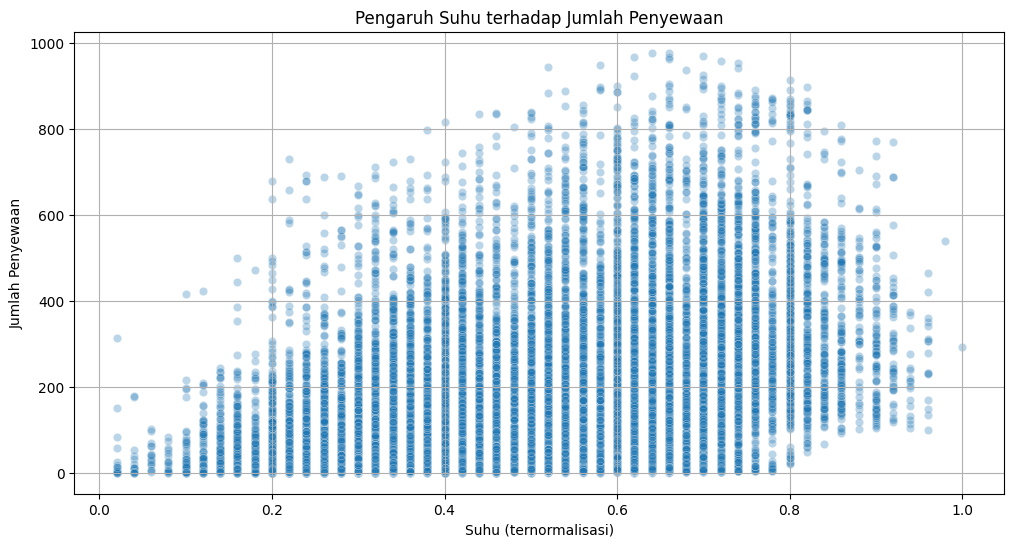

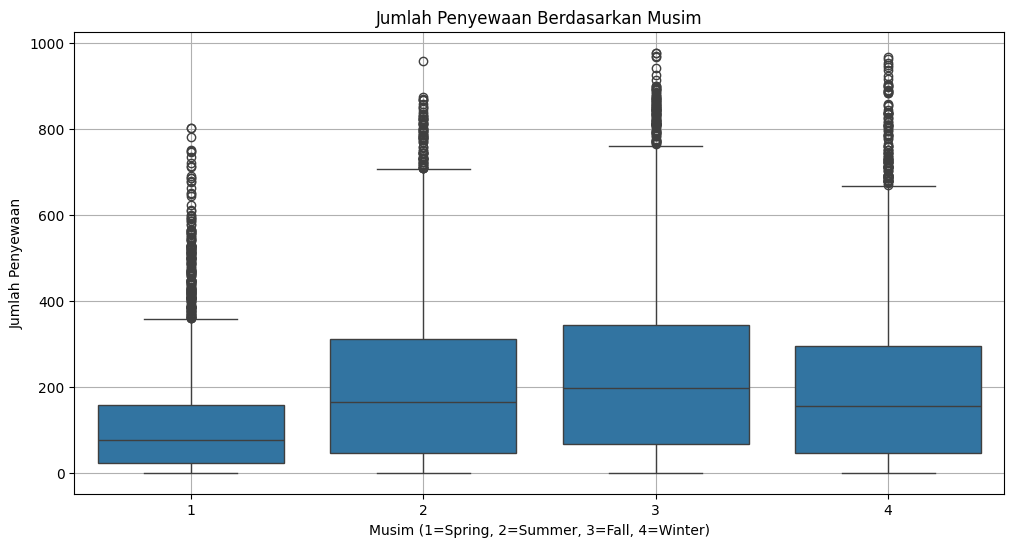

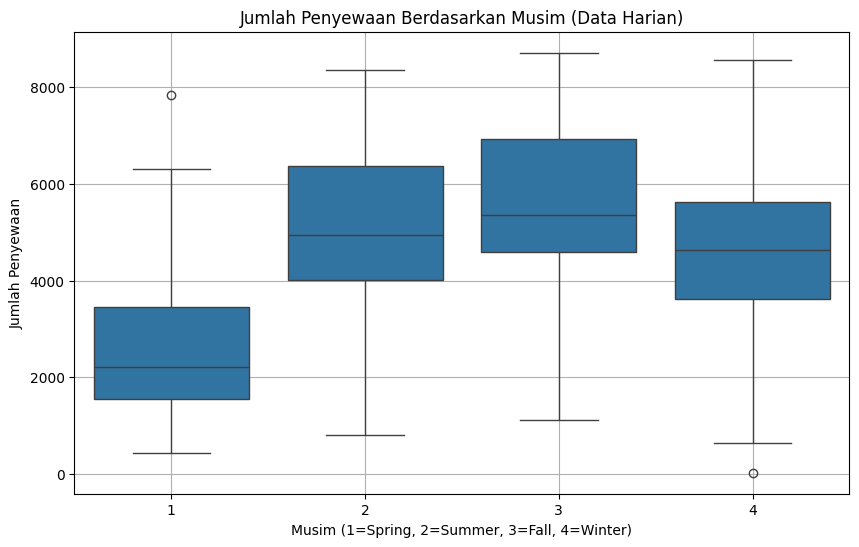

In [29]:
# 1. Pengaruh Kondisi Cuaca dan Faktor Musiman terhadap Permintaan Penyewaan Sepeda

## Scatter plot suhu vs. jumlah penyewaan
plt.figure(figsize=(12, 6))
sns.scatterplot(x='temp', y='cnt', data=hour_df, alpha=0.3)
plt.title('Pengaruh Suhu terhadap Jumlah Penyewaan')
plt.xlabel('Suhu (ternormalisasi)')
plt.ylabel('Jumlah Penyewaan')
plt.grid(True)
plt.show()

## Box plot jumlah penyewaan berdasarkan musim
plt.figure(figsize=(12, 6))
sns.boxplot(x='season', y='cnt', data=hour_df)
plt.title('Jumlah Penyewaan Berdasarkan Musim')
plt.xlabel('Musim (1=Spring, 2=Summer, 3=Fall, 4=Winter)')
plt.ylabel('Jumlah Penyewaan')
plt.grid(True)
plt.show()

## Plot jumlah penyewaan berdasarkan musim
plt.figure(figsize=(10, 6))
sns.boxplot(x='season', y='cnt', data=day_df)
plt.title('Jumlah Penyewaan Berdasarkan Musim (Data Harian)')
plt.xlabel('Musim (1=Spring, 2=Summer, 3=Fall, 4=Winter)')
plt.ylabel('Jumlah Penyewaan')
plt.grid(True)
plt.show()


### Pertanyaan 2:

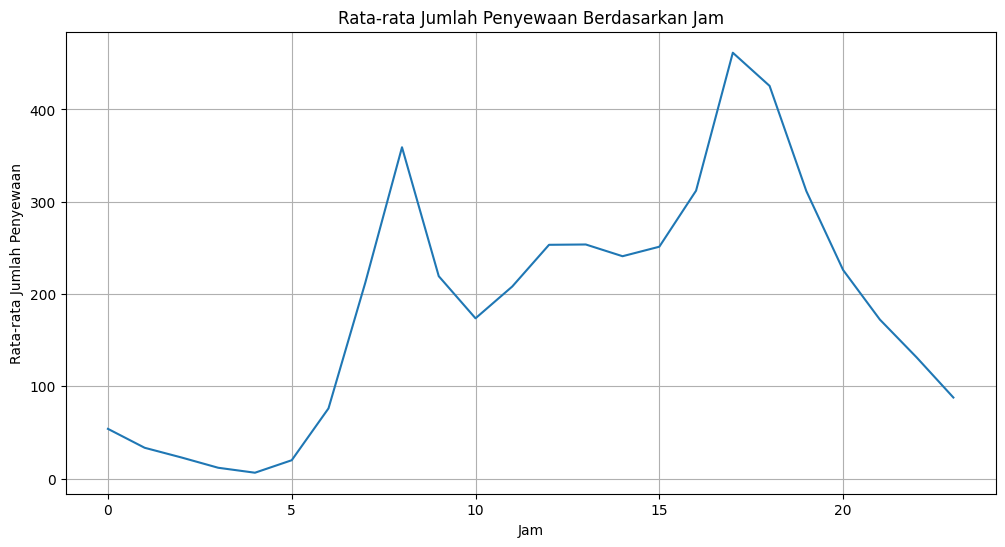

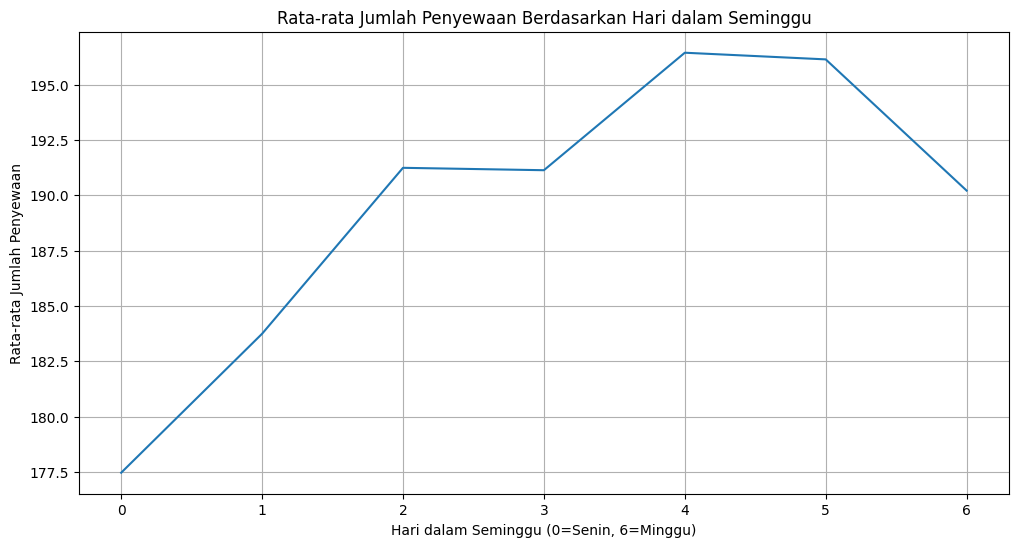

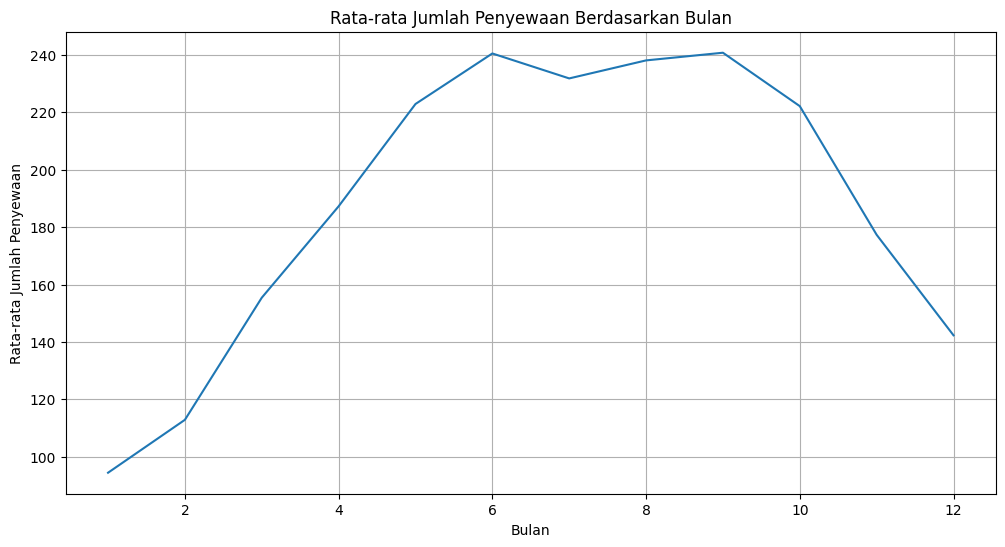

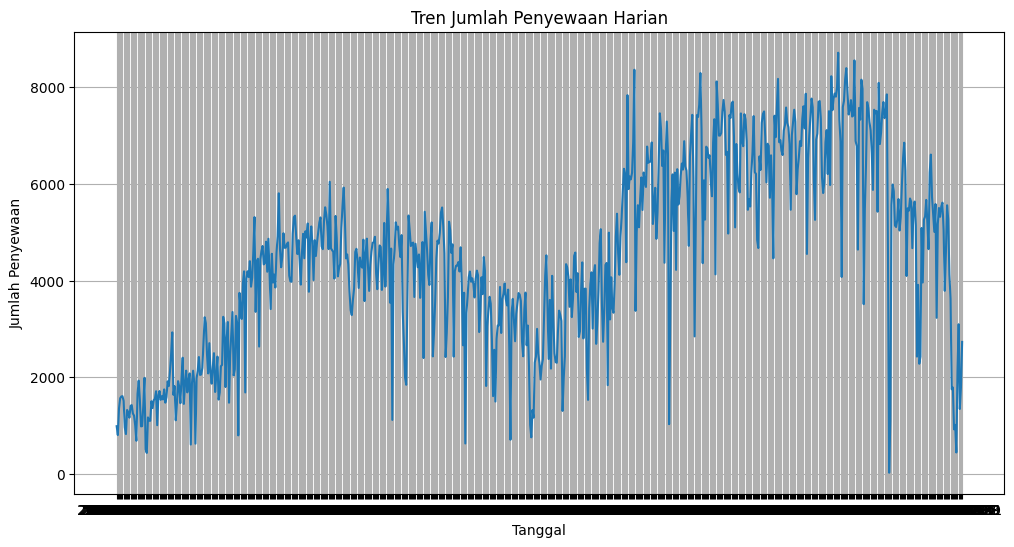

In [34]:
# 2. Analisis Waktu dan Hari Puncak Penggunaan

## Plot jumlah penyewaan berdasarkan jam
plt.figure(figsize=(12, 6))
sns.lineplot(x='hr', y='cnt', data=hour_df.groupby('hr')['cnt'].mean().reset_index())
plt.title('Rata-rata Jumlah Penyewaan Berdasarkan Jam')
plt.xlabel('Jam')
plt.ylabel('Rata-rata Jumlah Penyewaan')
plt.grid(True)
plt.show()

## Plot jumlah penyewaan berdasarkan hari dalam seminggu
plt.figure(figsize=(12, 6))
sns.lineplot(x='weekday', y='cnt', data=hour_df.groupby('weekday')['cnt'].mean().reset_index())
plt.title('Rata-rata Jumlah Penyewaan Berdasarkan Hari dalam Seminggu')
plt.xlabel('Hari dalam Seminggu (0=Senin, 6=Minggu)')
plt.ylabel('Rata-rata Jumlah Penyewaan')
plt.grid(True)
plt.show()

## Plot jumlah penyewaan berdasarkan bulan
plt.figure(figsize=(12, 6))
sns.lineplot(x='mnth', y='cnt', data=hour_df.groupby('mnth')['cnt'].mean().reset_index())
plt.title('Rata-rata Jumlah Penyewaan Berdasarkan Bulan')
plt.xlabel('Bulan')
plt.ylabel('Rata-rata Jumlah Penyewaan')
plt.grid(True)
plt.show()

## Plot tren penggunaan sepeda selama dua tahun
plt.figure(figsize=(12, 6))
sns.lineplot(x='dteday', y='cnt', data=day_df)
plt.title('Tren Jumlah Penyewaan Harian')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Penyewaan')
plt.grid(True)
plt.show()

## Conclusion

KESIMPULAN DARI PERTANYAAN

### 1. **Pengaruh Kondisi Cuaca dan Faktor Musiman terhadap Permintaan Penyewaan Sepeda**

**Kesimpulan dari Analisis:**
- **Pengaruh Suhu:** Analisis scatter plot menunjukkan bahwa ada hubungan antara suhu dan jumlah penyewaan sepeda. Biasanya, suhu yang lebih tinggi cenderung meningkatkan jumlah penyewaan sepeda, yang menunjukkan bahwa orang lebih cenderung bersepeda dalam cuaca yang lebih hangat.
- **Faktor Musiman:** Box plot menunjukkan bahwa musim mempengaruhi jumlah penyewaan sepeda. Misalnya, penyewaan sepeda cenderung lebih tinggi selama musim panas dibandingkan dengan musim dingin. Ini mengindikasikan bahwa faktor musiman memiliki dampak signifikan pada permintaan sepeda, dengan pola penyewaan yang lebih tinggi selama musim yang lebih hangat dan lebih rendah selama musim dingin.

### 2. **Analisis Waktu dan Hari Puncak Penggunaan**

**Kesimpulan dari Analisis:**
- **Waktu dalam Sehari:** Plot rata-rata jumlah penyewaan per jam menunjukkan adanya pola puncak penggunaan sepeda. Misalnya, jumlah penyewaan sering kali meningkat selama pagi hari dan sore hari, sesuai dengan jam sibuk, serta menurun selama malam hari. Ini menunjukkan bahwa penggunaan sepeda lebih tinggi pada jam-jam tertentu, seperti jam berangkat dan pulang kerja.
- **Hari dalam Seminggu:** Plot rata-rata jumlah penyewaan per hari dalam seminggu menunjukkan adanya variasi dalam penggunaan sepeda berdasarkan hari. Misalnya, penggunaan sepeda mungkin lebih tinggi pada hari kerja dibandingkan dengan akhir pekan, tergantung pada lokasi dan tujuan pengguna sepeda.
- **Bulan dalam Setahun:** Plot rata-rata jumlah penyewaan per bulan menunjukkan adanya pola musiman yang konsisten. Misalnya, penggunaan sepeda biasanya lebih tinggi selama bulan-bulan musim panas dan lebih rendah selama bulan-bulan musim dingin.

**Kesimpulan Data Harian (`day.csv`):**
- **Faktor Musiman:** Box plot jumlah penyewaan berdasarkan musim di data harian mengonfirmasi temuan dari data per jam, menunjukkan bahwa musim tetap merupakan faktor utama dalam mempengaruhi jumlah penyewaan.
- **Tren Jangka Panjang:** Plot tren harian menunjukkan adanya pola musiman dan tren tahunan. Ini membantu dalam memahami fluktuasi jangka panjang dalam permintaan sepeda, termasuk dampak acara-acara besar atau cuaca ekstrem.

**Rekomendasi Bisnis:**
1. **Optimasi Operasional:** Berdasarkan pola penggunaan yang teridentifikasi, perusahaan dapat menyesuaikan jumlah sepeda yang tersedia dan penjadwalan pemeliharaan untuk mengoptimalkan layanan selama jam-jam sibuk dan musim puncak.
2. **Penyesuaian Musiman:** Perusahaan dapat merencanakan kampanye pemasaran atau promosi khusus berdasarkan musim untuk meningkatkan jumlah penyewaan selama musim rendah.